In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


(1797, 64)
0


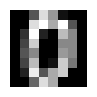

In [2]:
# 데이터 준비
from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data']
y = digits['target']

print(X.shape)

print(y[0])
plt.figure(figsize=(1, 1))
# plt.imshow(X[0].reshape(1, 64), cmap="gray") # 이미지 표시
plt.imshow(X[0].reshape(8, 8), cmap="gray") # 이미지 표시
plt.axis("off")
plt.show()

In [3]:
# 3과 3이 아닌 숫자 분류 모델 만들기

yis3 = (y==3).astype(int)
np.unique(yis3, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, yis3, stratify=yis3, random_state=42)

LogisticRegression(max_iter=1000)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier # 무작위 예측 모델

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

dc = DummyClassifier(strategy="most_frequent") #
dc.fit(X_train, y_train)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# logreg.score(X_train, y_train), logreg.score(X_test, y_test)

test_predicted = logreg.predict(X_test) # 학습한 모델을 사용해서 예측
print( (test_predicted == y_test).sum() / len(y_test) ) # 정답의 갯수 / 전체 갯수 : 정확도 (accuracy)

dummy_predicted = dc.predict(X_test) # 모든 문제에 대해 0으로 예측 (찍기)
print( (dummy_predicted == y_test).sum() / len(y_test) )

tree_predicted = tree.predict(X_test)
print( (tree_predicted == y_test).sum() / len(y_test) )


0.98
0.8977777777777778
0.9688888888888889


[[398   6]
 [  3  43]]
[[404   0]
 [ 46   0]]


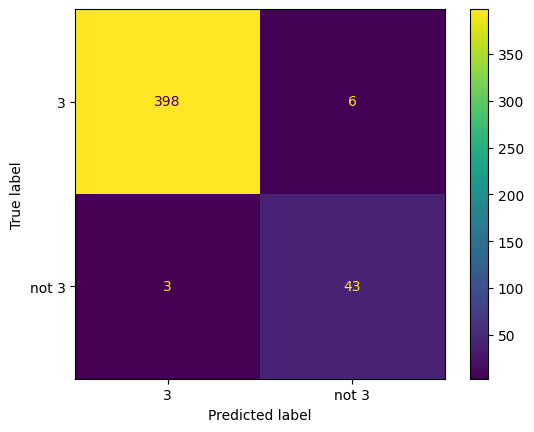

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, test_predicted)
cm2 = confusion_matrix(y_test, dummy_predicted)

print(cm1)
print(cm2)

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=["3", "not 3"])
plt.show()

In [14]:
from sklearn.metrics import recall_score, precision_score, f1_score

print(precision_score(y_test, test_predicted, zero_division=0), 
      recall_score(y_test, test_predicted, zero_division=0), 
      f1_score(y_test, test_predicted, zero_division=0) )

print(precision_score(y_test, dummy_predicted, zero_division=0), 
      recall_score(y_test, dummy_predicted, zero_division=0), 
      f1_score(y_test, dummy_predicted, zero_division=0) )

0.8775510204081632 0.9347826086956522 0.9052631578947369
0.0 0.0 0.0


In [15]:
from sklearn.metrics import classification_report

print( classification_report(y_test, test_predicted, zero_division=0) )
print( classification_report(y_test, dummy_predicted, zero_division=0) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       404
           1       0.88      0.93      0.91        46

    accuracy                           0.98       450
   macro avg       0.94      0.96      0.95       450
weighted avg       0.98      0.98      0.98       450

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       404
           1       0.00      0.00      0.00        46

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450



In [16]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [20]:
logreg2 = LogisticRegression(max_iter=10000)
logreg2.fit(X_train, y_train)
lr_predict = logreg2.predict(X_train) # 임계치 0 (decision_function) 또는 임계치 0.5 (predict_proba) 사용
print( logreg2.score(X_train, y_train) )
confusion_matrix(y_train, lr_predict)

0.9577464788732394


array([[149,  10],
       [  8, 259]], dtype=int64)

In [21]:
prob_values = logreg2.predict_proba(X_train)
deci_values = logreg2.decision_function(X_train)

In [23]:
prob_values[:3], deci_values[:3]

(array([[9.99925391e-01, 7.46089516e-05],
        [1.32463601e-04, 9.99867536e-01],
        [9.99999910e-01, 8.95182935e-08]]),
 array([ -9.50317545,   8.92907019, -16.22882275]))

In [28]:
(prob_values[:, 1] > 0.5).astype(int)[:10], (deci_values > 0).astype(int)[:10], lr_predict[:10]

(array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1]))

In [39]:
result2 = (deci_values > -0.5).astype(int)

print( result2[:10], lr_predict[:10] )

confusion_matrix(y_train, result2)

[0 1 0 0 0 0 1 0 0 1] [0 1 0 0 0 0 1 0 0 1]


array([[147,  12],
       [  5, 262]], dtype=int64)